In [1]:
# Colab-ready MNIST webcam recognition code
!pip install opencv-python numpy tensorflow matplotlib pillow

In [21]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode
import PIL
import io
import time

In [22]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

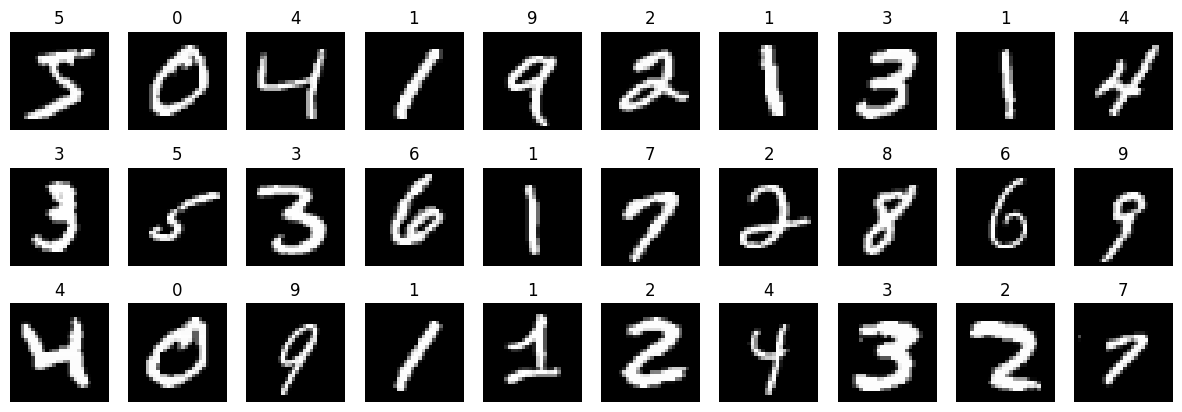

In [38]:
plt.figure(figsize=(15, 5))
for i in range(30):
    plt.subplot(3, 10, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(str(y_train[i]))
    plt.axis("off")

plt.show()

In [4]:
# Create CNN model
def create_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Data augmentation
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

In [6]:
# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=128),
                    epochs=10,
                    validation_data=(x_test, y_test))

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 203ms/step - accuracy: 0.7425 - loss: 0.7757 - val_accuracy: 0.9825 - val_loss: 0.0515
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 90s 192ms/step - accuracy: 0.9376 - loss: 0.2055 - val_accuracy: 0.9883 - val_loss: 0.0363
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 89s 190ms/step - accuracy: 0.9531 - loss: 0.1561 - val_accuracy: 0.9896 - val_loss: 0.0307
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 90s 192ms/step - accuracy: 0.9598 - loss: 0.1338 - val_accuracy: 0.9905 - val_loss: 0.0290
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 89s 189ms/step - accuracy: 0.9645 - loss: 0.1186 - val_accuracy: 0.9914 - val_loss: 0.0267
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 89s 191ms/step - accuracy: 0.9673 - loss: 0.1079 - val_accuracy: 0.9920 - val_loss: 0.0238
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 90s 191ms/step - accuracy: 0.9701 - loss: 0.1027 - val_accuracy: 0.9926 - val_loss: 0.0232
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 89s 191ms/step - accuracy: 0.9716 - loss: 0

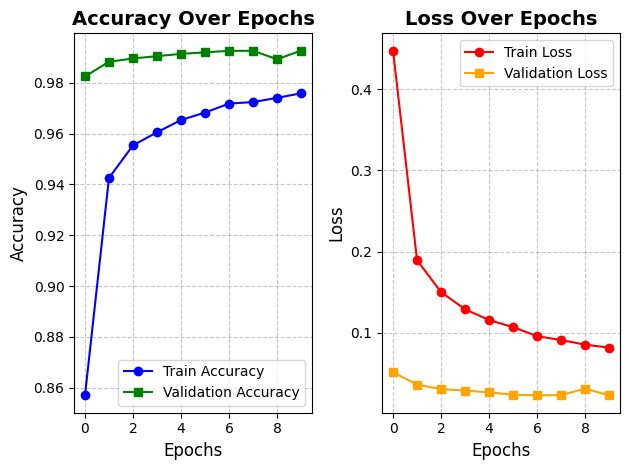

In [37]:
    # Accuracy graph
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], marker='o', color='blue', label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], marker='s', color='green', label='Validation Accuracy')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.title('Accuracy Over Epochs', fontsize=14, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()

    # Loss graph
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], marker='o', color='red', label='Train Loss')
    plt.plot(history.history['val_loss'], marker='s', color='orange', label='Validation Loss')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.title('Loss Over Epochs', fontsize=14, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [39]:
# Webcam capture function
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);
            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video:true});
            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
            await new Promise((resolve) => capture.onclick = resolve);
            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video,0,0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    img = PIL.Image.open(io.BytesIO(binary))
    img = np.array(img)
    img = img[:,:,::-1].copy()
    cv2.imwrite(filename, img)
    return img

In [40]:
# Preprocess webcam digit
def preprocess_webcam_digit(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5,5),0)
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = [c for c in contours if cv2.contourArea(c) > 50]
    if not contours:
        print("No contours found")
        return None, None
    largest = max(contours, key=cv2.contourArea)
    x,y,w,h = cv2.boundingRect(largest)
    digit = thresh[y:y+h, x:x+w]
    size = max(w,h)
    square = np.zeros((size,size), dtype=np.uint8)
    square[(size-h)//2:(size-h)//2+h, (size-w)//2:(size-w)//2+w] = digit
    resized = cv2.resize(square, (28,28), interpolation=cv2.INTER_AREA)
    normalized = resized / 255.0
    plt.imshow(normalized, cmap='gray')
    plt.title('Processed Digit (Black bg, White text)')
    plt.axis('off')
    plt.show()
    return normalized.reshape(1,28,28,1), (x,y,w,h)

Handwritten Digit Recognition System Ready!
Prepare to write your digit and hold in front of webcam in 3 seconds...


<IPython.core.display.Javascript object>

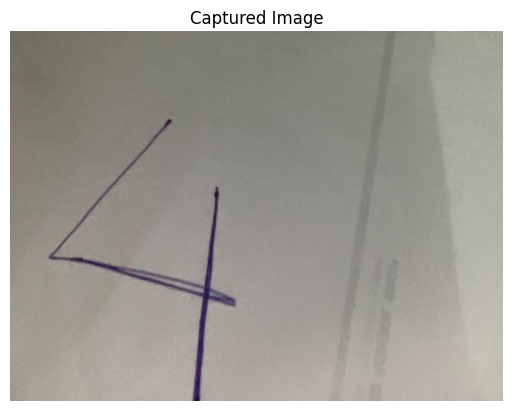

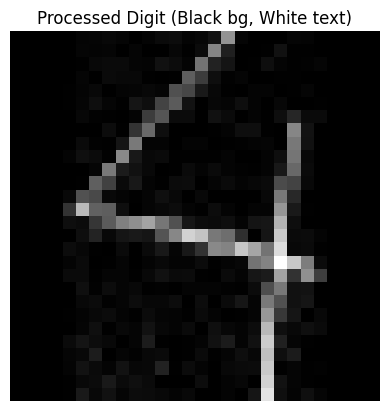

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted digit: 4 (Confidence: 54.35%)


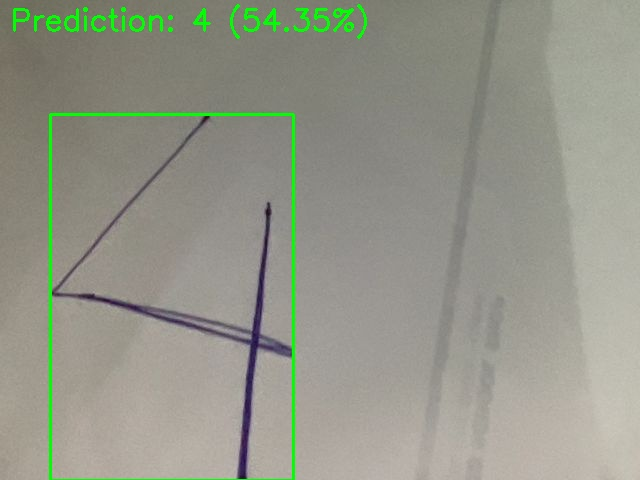

In [43]:
# Recognition function
def recognize_digit():
    print("Prepare to write your digit and hold in front of webcam in 3 seconds...")
    time.sleep(3)
    img = take_photo('digit.jpg')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Captured Image')
    plt.axis('off')
    plt.show()
    processed_img, bbox = preprocess_webcam_digit(img)
    if processed_img is None:
        print("No digit detected.")
        return
    predictions = model.predict(processed_img)
    digit = np.argmax(predictions)
    confidence = np.max(predictions)
    print(f"Predicted digit: {digit} (Confidence: {confidence:.2%})")
    x,y,w,h = bbox
    img_copy = img.copy()
    cv2.rectangle(img_copy, (x,y), (x+w,y+h), (0,255,0),2)
    cv2.putText(img_copy, f"Prediction: {digit} ({confidence:.2%})", (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0),2)
    cv2.imwrite('result.jpg', img_copy)
    display(Image('result.jpg'))

print("Handwritten Digit Recognition System Ready!")
recognize_digit()